# K-Means

## Visual 2D clustering

In [ ]:
import requests
import json
import matplotlib.pyplot as plt

# Endpunkt für basic KMeans Route 
url = "http://localhost:8080/basic/perform-2d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 0,
    "Column 2": 1,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "k_clusters": 5,
    "user_id": 0,
    "request_id": 0
}

files = {
    "file": open("IRIS.csv", "rb")
}

# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()

# Plotte Ergebnis
plt.figure(figsize=(10, 8))

# Gehe durch jeden Cluster
for cluster in result["cluster"]:
    centroid = cluster["centroid"]
    points = cluster["points"]

    # Extrahiere Datenpunkte
    point_x = [p["x"] for p in points]
    point_y = [p["y"] for p in points]

    # Plotte Cluster
    plt.scatter(point_x, point_y, label=f"Cluster {cluster['clusterNr']}")

    # Plotte Zentroid
    plt.scatter(centroid["x"], centroid["y"], color="black", marker="x")

# Achsenbeschriftung
plt.xlabel(result["x_label"])
plt.ylabel(result["y_label"])

plt.legend()
plt.title(f"KMeans mit k={len(result['cluster'])}")
plt.tight_layout()
plt.show()


## Visual 2D clustering (autom. k)

In [ ]:
import requests
import json
import matplotlib.pyplot as plt

# Endpunkt für advanced KMeans Route 
url = "http://localhost:8080/advanced/perform-advanced-2d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 1,
    "Column 2": 0,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "user_id": 0,
    "request_id": 0
}

files = {
    "file": open("IRIS.csv", "rb")
}

# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()

# Plotte Ergebnis
plt.figure(figsize=(10, 8))

# Gehe durch jeden Cluster
for cluster in result["cluster"]:
    centroid = cluster["centroid"]
    points = cluster["points"]

    # Extrahiere Datenpunkte
    point_x = [p["x"] for p in points]
    point_y = [p["y"] for p in points]

    # Plotte Cluster
    plt.scatter(point_x, point_y, label=f"Cluster {cluster['clusterNr']}")

    # Plotte Zentroid
    plt.scatter(centroid["x"], centroid["y"], color="black", marker="x")

# Achsenbeschriftung
plt.xlabel(result["x_label"])
plt.ylabel(result["y_label"])

plt.legend()
plt.title(f"KMeans mit k={len(result['cluster'])}")
plt.tight_layout()
plt.show()


## Visual 3D clustering

In [7]:
import requests
import json
import matplotlib.pyplot as plt
import ipywidgets as widgets
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

#region setup
# Endpunkt für 3D KMeans Route 
url = "http://localhost:8080/basic/perform-3d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 0,
    "Column 2": 1,
    "Column 3": 2,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "k_clusters": 5,
    "user_id": 0,
    "request_id": 0,
    "normalize": True
}

files = {
    "file": open("IRIS.csv", "rb")
}

# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()
#endregion

#region interactive plot

def plot_3d(elev=20, azim=30):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in result["cluster"]:
        centroid = cluster["centroid"]
        points = cluster["points"]

        # Extrahiere Datenpunkte
        point_x = [p["x"] for p in points]
        point_y = [p["y"] for p in points]
        point_z = [p["z"] for p in points]

        # Plotte Cluster
        ax.scatter(point_x, point_y, point_z, s=50, label=f"Cluster {cluster['clusterNr']}")

        # Plotte Zentroid
        ax.scatter(centroid["x"], centroid["y"], centroid["z"], color="black", marker="x", s=100)

    ax.set_xlabel(f"X: {result['x_label']}", labelpad=20)
    ax.set_ylabel(f"Y: {result['y_label']}", labelpad=20)
    ax.set_zlabel(f"Z: {result['z_label']}", labelpad=20)
    ax.grid(True)
    ax.view_init(elev=elev, azim=azim)

    ax.legend(loc='upper left')
    ax.set_title(f"3D KMeans mit k={len(result['cluster'])}", pad=30)

    plt.tight_layout()
    plt.show()
widgets.interactive(plot_3d, elev=(0, 90, 5), azim=(0, 360, 10))

#endregion


interactive(children=(IntSlider(value=20, description='elev', max=90, step=5), IntSlider(value=30, description…

## Visuals 3D clustering (autom. k)

In [6]:
import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets
# Endpunkt für 3D KMeans Route 
url = "http://localhost:8080/advanced/perform-advanced-3d-kmeans/"

# Daten für die Anfrage
params = {
    "Column 1": 0,
    "Column 2": 1,
    "Column 3": 2,
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "user_id": 0,
    "request_id": 0,
    "normalize": True
}

files = {
    "file": open("IRIS.csv", "rb")
}

# Sende POST-Anfrage
response = requests.post(url, files=files, params=params)

# Lade JSON-Antwort in Variable
result = response.json()

def plot_3d(elev=20, azim=30):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')

    for cluster in result["cluster"]:
        centroid = cluster["centroid"]
        points = cluster["points"]

        # Extrahiere Datenpunkte
        point_x = [p["x"] for p in points]
        point_y = [p["y"] for p in points]
        point_z = [p["z"] for p in points]

        # Plotte Cluster
        ax.scatter(point_x, point_y, point_z, s=50, label=f"Cluster {cluster['clusterNr']}")

        # Plotte Zentroid
        ax.scatter(centroid["x"], centroid["y"], centroid["z"], color="black", marker="x", s=100)

    ax.set_xlabel(f"X: {result['x_label']}", labelpad=20)
    ax.set_ylabel(f"Y: {result['y_label']}", labelpad=20)
    ax.set_zlabel(f"Z: {result['z_label']}", labelpad=20)
    ax.grid(True)
    ax.view_init(elev=elev, azim=azim)

    ax.legend(loc='upper left')
    ax.set_title(f"3D KMeans mit k={len(result['cluster'])}", pad=30)

    plt.tight_layout()
    plt.show()

widgets.interactive(plot_3d, elev=(0, 90, 5), azim=(0, 360, 10))


interactive(children=(IntSlider(value=20, description='elev', max=90, step=5), IntSlider(value=30, description…

## Visual n-Dimensionales Clustering

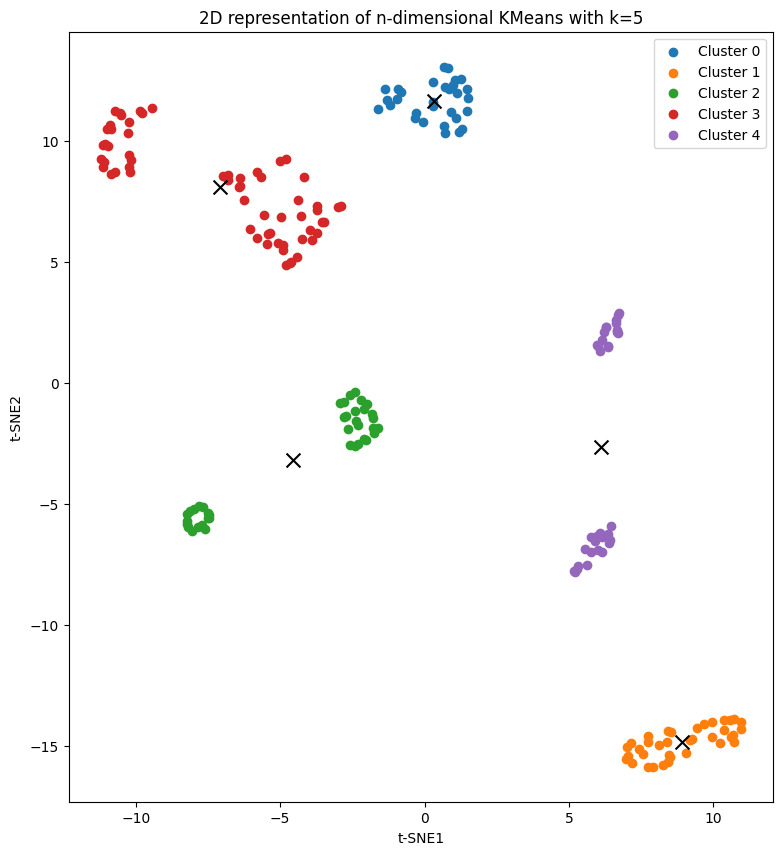

In [24]:
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # für 3D-Plot

url = "http://localhost:8080/basic/perform-nd-kmeans/"
files = {
    "file": open("drug200.csv", "rb")
}

# 2D-Anfrage
params_2d = {
    "use_3d_model": False,
    "k_clusters": 5
}
response_2d = requests.post(url, files=files, params=params_2d)
result_2d = response_2d.json()

# 2D-Visualisierung
plt.figure(figsize=(20, 10))

# 2D-Plot
plt.subplot(1, 2, 1)  # 1 Zeile, 2 Spalten, aktuelle Position ist 1
clusters_2d = result_2d["cluster"]
x_label_2d = result_2d["x_label"]
y_label_2d = result_2d["y_label"]
for cluster in clusters_2d:
    points = cluster["points"]
    x_values = [point['x'] for point in points]  # Changed here
    y_values = [point['y'] for point in points]  # Changed here
    plt.scatter(x_values, y_values, label=f"Cluster {cluster['clusterNr']}")
    centroid = cluster["centroid"]
    plt.scatter(centroid["x"], centroid["y"], color="black", marker="x", s=100)
plt.xlabel(x_label_2d)
plt.ylabel(y_label_2d)
plt.legend()
plt.title(f"2D representation of n-dimensional KMeans with k={result_2d['k_value']}")

plt.show()




In [27]:
import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets

files = {
    "file": open("drug200.csv", "rb")
}

url = "http://localhost:8080/basic/perform-nd-kmeans/"

# 3D-Anfrage
params_3d = {
    "k_clusters": 5,
    "use_3d_model": True
}
response_3d = requests.post(url, files=files, params=params_3d)
result_3d = response_3d.json()

def plot_3d_clusters(elev=20, azim=30):
    plt.figure(figsize=(25, 12))

    # 3D-Plot
    ax = plt.subplot(1, 2, 2, projection='3d')
    clusters_3d = result_3d["cluster"]
    x_label_3d = result_3d["x_label"]
    y_label_3d = result_3d["y_label"]
    z_label_3d = result_3d["z_label"]
    for cluster in clusters_3d:
        points = cluster["points"]
        x_values = [point['x'] for point in points]
        y_values = [point['y'] for point in points]
        z_values = [point['z'] for point in points]
        ax.scatter(x_values, y_values, z_values, label=f"Cluster {cluster['clusterNr']}")
        centroid = cluster["centroid"]
        ax.scatter(centroid["x"], centroid["y"], centroid["z"], color="black", marker="x", s=100)
    ax.set_xlabel(x_label_3d)
    ax.set_ylabel(y_label_3d)
    ax.set_zlabel(z_label_3d)
    ax.view_init(elev=elev, azim=azim)
    ax.legend()
    ax.set_title(f"3D representation of n-dimensional KMeans with k={result_3d['k_value']}")
    plt.show()

widgets.interactive(plot_3d_clusters, elev=(0, 90, 5), azim=(0, 360, 10))


interactive(children=(IntSlider(value=20, description='elev', max=90, step=5), IntSlider(value=30, description…

## Visual n-Dimensionales Clustering (autom. k)

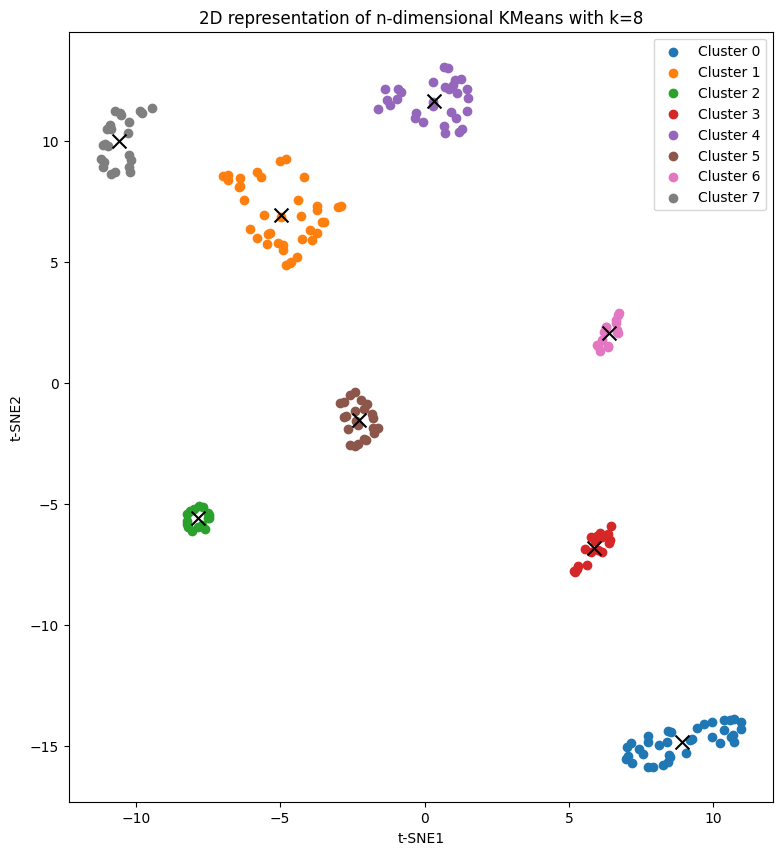

In [28]:
import requests
import matplotlib.pyplot as plt

url = "http://localhost:8080/advanced/perform-advanced-nd-kmeans/"
files = {
    "file": open("drug200.csv", "rb")
}

# 2D-Anfrage
params_2d = {
    "use_3d_model": False
}
response_2d = requests.post(url, files=files, params=params_2d)
result_2d = response_2d.json()

# 2D-Visualisierung
plt.figure(figsize=(20, 10))

# 2D-Plot
plt.subplot(1, 2, 1)  # 1 Zeile, 2 Spalten, aktuelle Position ist 1
clusters_2d = result_2d["cluster"]
x_label_2d = result_2d["x_label"]
y_label_2d = result_2d["y_label"]
for cluster in clusters_2d:
    points = cluster["points"]
    x_values = [point['x'] for point in points]  # Changed here
    y_values = [point['y'] for point in points]  # Changed here
    plt.scatter(x_values, y_values, label=f"Cluster {cluster['clusterNr']}")
    centroid = cluster["centroid"]
    plt.scatter(centroid["x"], centroid["y"], color="black", marker="x", s=100)
plt.xlabel(x_label_2d)
plt.ylabel(y_label_2d)
plt.legend()
plt.title(f"2D representation of n-dimensional KMeans with k={result_2d['k_value']}")

plt.show()

In [29]:
import requests
import matplotlib.pyplot as plt
import ipywidgets as widgets

files = {
    "file": open("drug200.csv", "rb")
}

url = "http://localhost:8080/advanced/perform-advanced-nd-kmeans/"

# 3D-Anfrage
params_3d = {
    "distance_metric": "EUCLIDEAN",
    "kmeans_type": "OptimizedKMeans",
    "use_3d_model": True
}
response_3d = requests.post(url, files=files, params=params_3d)
result_3d = response_3d.json()

def plot_3d_clusters(elev=20, azim=30):
    fig = plt.figure(figsize=(25, 12))

    # 3D-Plot
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    clusters_3d = result_3d["cluster"]
    x_label_3d = result_3d["x_label"]
    y_label_3d = result_3d["y_label"]
    z_label_3d = result_3d["z_label"]
    
    for cluster in clusters_3d:
        points = cluster["points"]
        x_values = [point['x'] for point in points]
        y_values = [point['y'] for point in points]
        z_values = [point['z'] for point in points]
        ax.scatter(x_values, y_values, z_values, label=f"Cluster {cluster['clusterNr']}")
        centroid = cluster["centroid"]
        ax.scatter(centroid["x"], centroid["y"], centroid["z"], color="black", marker="x", s=100)
        
    ax.set_xlabel(x_label_3d)
    ax.set_ylabel(y_label_3d)
    ax.set_zlabel(z_label_3d)
    ax.view_init(elev=elev, azim=azim)
    ax.legend()
    ax.set_title(f"3D representation of n-dimensional KMeans with k={result_3d['k_value']}")
    
    plt.tight_layout()
    plt.show()

widgets.interactive(plot_3d_clusters, elev=(0, 90, 5), azim=(0, 360, 10))


interactive(children=(IntSlider(value=20, description='elev', max=90, step=5), IntSlider(value=30, description…

# Elbow

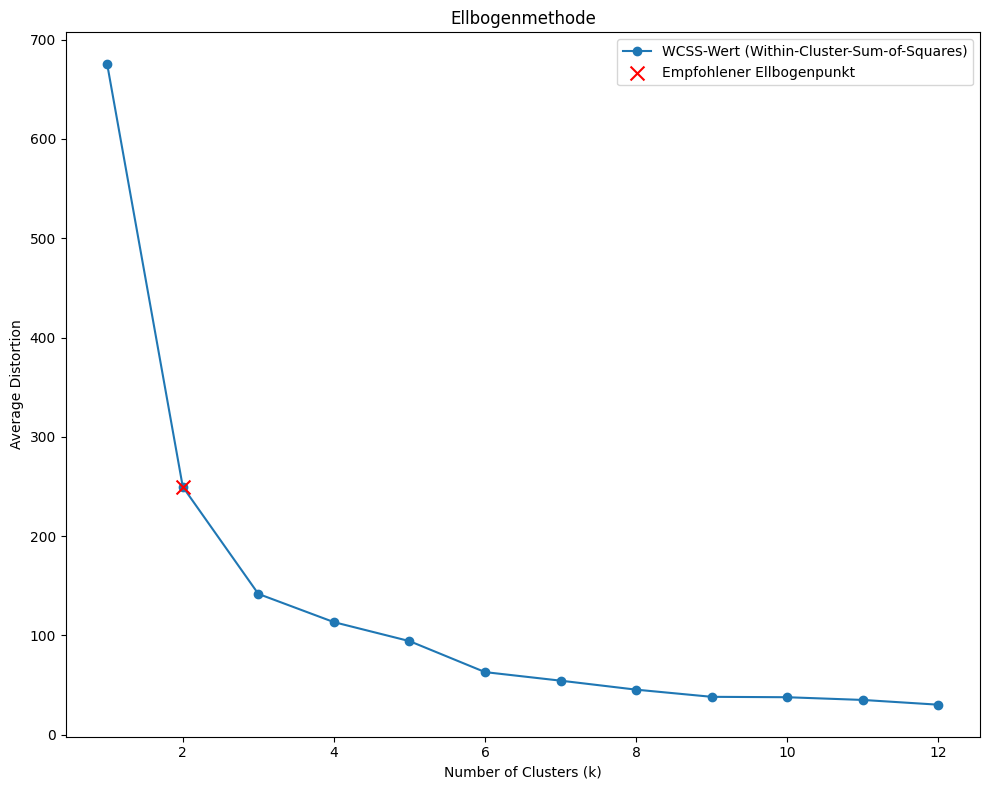

In [18]:
import requests
import matplotlib.pyplot as plt

# Endpunkt für die Ellbogenmethode
url = "http://localhost:8080/determination/elbow"

# Daten für die Anfrage
files = {
    "file": open("IRIS.csv", "rb")  # Ersetzen Sie 'Ihre_Datei.csv' durch den Namen Ihrer CSV-Datei.
}
data = {
    "method": "optimized"  # "standard" oder "optimized"
}

# Sende POST-Anfrage
response = requests.post(url, files=files, data=data)

# Überprüfen Sie den Statuscode der Antwort, um sicherzustellen, dass die Anfrage erfolgreich war
if response.status_code != 200:
    print("Fehler beim Abrufen der Daten:", response.text)
else:
    # Lade JSON-Antwort in Variable
    result = response.json()

    # Datenpunkte extrahieren
    x_values = [point["x"] for point in result["points"]]
    y_values = [point["y"] for point in result["points"]]

    # Plotte Datenpunkte
    plt.figure(figsize=(10, 8))
    plt.plot(x_values, y_values, marker='o', label="WCSS-Wert (Within-Cluster-Sum-of-Squares)")

    # Plotte empfohlenen Ellbogenpunkt
    recommended_x = result["recommended_point"]["x"]
    recommended_y = result["recommended_point"]["y"]
    plt.scatter(recommended_x, recommended_y, color="red", marker="x", s=100, zorder=3, label="Empfohlener Ellbogenpunkt")

    # Achsenbeschriftung und Titel
    plt.xlabel(result["labels"]["x"])
    plt.ylabel(result["labels"]["y"])
    plt.title("Ellbogenmethode")
    plt.legend()

    plt.tight_layout()
    plt.show()

# Dessicion Tree

In [ ]:
import requests
import graphviz
import json
from IPython.display import display

# Aktualisierte URL
url = url = "http://localhost:8080/classification_decision_tree/perform-classification-decision-tree/"

params = {
    "SampleCount4Split": 2,
    "max_depth": 100,
    "SplitStrategy": "Best Split",
    "BestSplitStrategy": "Information Gain",
    #"ClassColumnNumber": 5,
    "ClassColumnName": "quality",
    "Pruning?": True,
}

# Datei hochladen
files = {
    #"file": open("drug200.csv", "rb")
    "file": open("winequality-white.csv", "rb")
}
response = requests.post(url=url, files=files, params=params)
result = response.json()
#print(json.dumps(result, indent=4, sort_keys=True))

# Funktion zur Visualisierung des Entscheidungsbaums
def visualize_decision_tree(result):
    def visualize_node(dot, node, parent=None):
        if "feature_name" in node:
            feature_name = node["feature_name"]
            feature_id_name = node["feature_id_name"]
            treshold = str(node["treshold"])
            dot.node(str(id(node)), f"{feature_name}\n{feature_id_name}\nTreshold: {treshold}")
        else:  # Dieser Teil wurde hinzugefügt, um Knoten ohne "feature_name" zu handhaben
            value = str(node.get("value", "Unknown"))  # Verwenden Sie "Unknown", wenn kein Wert vorhanden ist
            dot.node(str(id(node)), f"Class: {value}")

        if parent is not None:
            dot.edge(str(id(parent)), str(id(node)))

        if "left" in node:
            visualize_node(dot, node["left"], parent=node)

        if "right" in node:
            visualize_node(dot, node["right"], parent=node)

    dot = graphviz.Digraph(format="png")
    visualize_node(dot, result["root"])
    dot.render("decision_tree")
    display(dot)

visualize_decision_tree(result=result)


![Decision Tree](decision_tree.png)